In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
seed = 42
np.random.seed(seed)

In [4]:
data = pd.read_csv('train1.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
y_raw = data['Survived']
x_raw = data.drop(columns=['Survived'], axis=1)

In [5]:
x_raw.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Это не совсем колонки, а набор входных признаков

In [6]:
y_raw.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
x_raw.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
drop = ['PassengerId' ,'Name', 'Ticket', 'Cabin', 'Embarked']

In [8]:
x_raw.drop(columns=drop, inplace=True)

In [9]:
x_raw.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [10]:
x_raw.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [14]:
x_raw.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [11]:
def binarize(x_raw):
    if x_raw == 'female':
        return 1
    else:
        return 0

In [13]:
x_raw['Sex'] = x_raw['Sex'].apply(lambda x_raw: binarize(x_raw))

In [33]:
x_raw.isna().sum().sum()

177

Означает, что не заполнено 177 значений

Попробуем заполнить возраст модами

In [14]:
x_raw['Age_unk'] = x_raw['Age'].apply(lambda x_raw: np.isnan(x_raw))

In [15]:
x_raw['Age'].fillna(x_raw['Age'].median(), inplace=True)

In [28]:
%%time
parameters = {'n_estimators':range(1,100,5), 'max_features':range(1,7), 'max_depth': range(1, 10)}
model = RandomForestClassifier(n_jobs = -1)
clf = GridSearchCV(model, parameters)
clf.fit(x, y)

Wall time: 12min 25s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             

In [ ]:
from sklearnearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform, norm, gamma

distributions =dict('n_estimators'=uniform(loc=1, scale=99), 'max_depth':range(1,10))

clf = RandomSearchCV(modell, distributions, randon_state=seed, cv=5)

In [17]:
x, x_test, y, y_test = train_test_split(x_raw, y_raw, test_size=0.15,
                                                   random_state=seed)

In [20]:
clf.cv_results_['mean_test_score'] #без найстройки количесва признаков для выбора

array([0.73976222, 0.79392338, 0.79656539, 0.80317041, 0.80317041,
       0.81241744, 0.79524439, 0.81241744, 0.80317041, 0.79524439,
       0.81109643, 0.80581242, 0.80317041, 0.80977543, 0.79392338,
       0.8005284 , 0.80581242, 0.81109643, 0.81638045, 0.79524439])

In [29]:
clf.cv_results_['mean_test_score'].max()

0.8335535006605019

In [15]:
kf = KFold(n_splits=5, shuffle=True)

In [28]:
!pip install graphviz

In [16]:
from sklearn.tree import DecisionTreeClassifier


In [23]:
x.reset_index(inplace=True, drop=True)
x.drop(columns=['index'], inplace=True)

KeyError: "['index'] not found in axis"

In [25]:
y = pd.DataFrame(y).reset_index(drop=True)
y.drop(columns=['index'], inplace=True)

KeyError: "['index'] not found in axis"

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn import tree

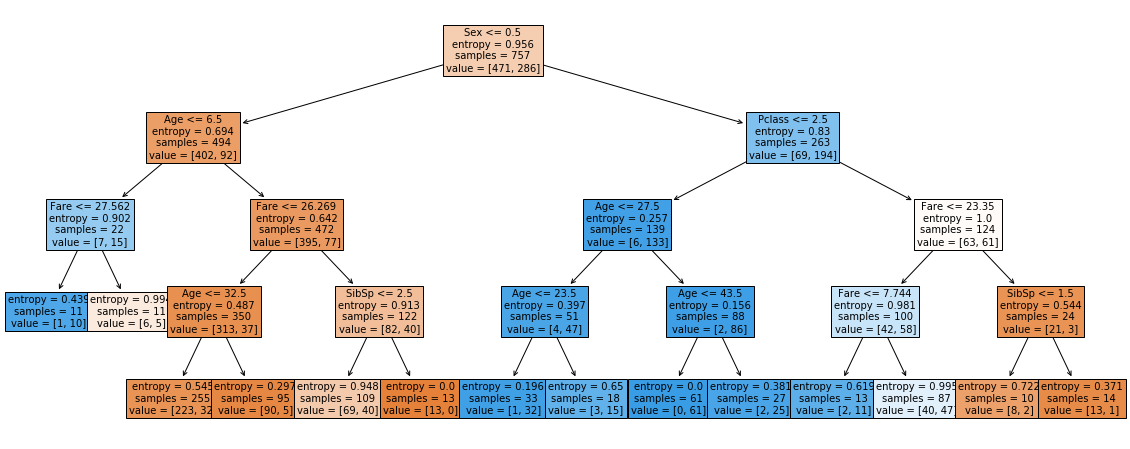

In [34]:
model = DecisionTreeClassifier(criterion='entropy', 
                               max_depth=4, min_samples_leaf=10,
                              min_samples_split=10)
model.fit(x, y)


plt.figure(figsize=(20, 8))
tree.plot_tree(model, fontsize=10, feature_names=list(x), filled=True);

In [51]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
model.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
result = pd.DataFrame()
for num, idxs in enumerate(kf.split(x)):
    print(f'Fold № {num}', )
    train_index = idxs[0]
    val_index = idxs[1]
    x_train, x_val = x.iloc[train_index], x.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    model = LogisticRegression()
    model.fit(x_train, y_train)
    dummy = {'Fold №': int(num), 'Accuracy' : model.score (x_val, y_val)}
    result = result.append(dummy, ignore_index=True)

Fold № 0


C:\Users\orstr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold № 1
Fold № 2
Fold № 3
Fold № 4


C:\Users\orstr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\orstr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\orstr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\orstr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
result

,Accuracy,Fold №
0,0.822368,0.0
1,0.756579,1.0
2,0.768212,2.0
3,0.788079,3.0
4,0.781457,4.0


In [21]:
print(f'mean {result.Accuracy.mean()}, std {result.Accuracy.std()}')
print(f'{result.Accuracy.mean()} \u00B1 {result.Accuracy.std()}')

mean 0.7833391425583827, std 0.024971177454924463
0.7833391425583827 ± 0.024971177454924463


In [19]:
x.isna().sum()

Pclass     0
Sex        0
Age        0
SibSp      0
Parch      0
Fare       0
Age_unk    0
dtype: int64

Теперь пропусков нет

Желательно создать новый признак, который говорит, что мы заполнили пустые строки

1)Перемешать данные
2)Разбит данные на train и test np.random.shuffle()

In [20]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Age_unk
0,3,0,22.0,1,0,7.2500,False
1,1,1,38.0,1,0,71.2833,False
2,3,1,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,3,0,35.0,0,0,8.0500,False
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,False
887,1,1,19.0,0,0,30.0000,False
888,3,1,28.0,1,2,23.4500,True
889,1,0,26.0,0,0,30.0000,False


Сделаем перемешивание

In [23]:
x_new.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Age_unk
709,3,0,28.0,1,1,15.2458,True
439,2,0,31.0,0,0,10.5000,False
840,3,0,20.0,0,0,7.9250,False
720,2,1,6.0,0,1,33.0000,False
39,3,1,14.0,1,0,11.2417,False


In [24]:
x_train = x_new[:int(.8*len(y))]
y_train = y[:int(.8*len(y))]

x_test = x_new[int(.8*len(y)):]
y_test = y[int(.8*len(y)):]

In [69]:
kf = KFold(n_splits=2, shuffle=True)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y, test_size=0.2,
                                                   random_state=seed)

In [65]:
accuracy_score(y_true=[1,0], y_pred=[1,1])

0.5

Функция для проверки точности

In [25]:
x_train.shape, y_train.shape

((712, 7), (712,))

In [53]:
import warnings
warnings. filterwarnings('ignore')

In [51]:
result = pd.DataFrame()
for C_ in range(1, 100):
    model = LogisticRegression(C=C_)
    model.fit(x_train, y_train)
    dummy = {'C' : C_,  'Accuracy' : model.score(x_train, y_train)}
    result = result.append(dummy, ignore_index=True)

In [50]:
result

,Accuracy,C
0,0.797753,1.0
1,0.801966,2.0
2,0.796348,3.0
3,0.797753,4.0
4,0.800562,5.0
...,...,...
94,0.800562,95.0
95,0.800562,96.0
96,0.800562,97.0
97,0.800562,98.0


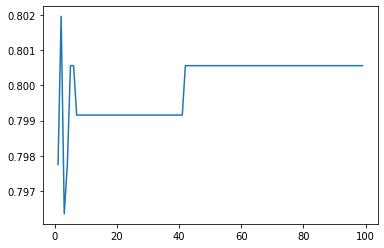

In [66]:
plt.plot(result.C, result.Accuracy)

In [67]:
result[result['Accuracy'] == result['Accuracy'].max]

,Accuracy,C


In [ ]:
model = clf.

In [62]:
data_test = pd.read_csv('test.csv')

preds_data = pd.DataFrame(data_test['PassengerId'][:418])

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

x_test_kaggle = data_test[features]

x_test_kaggle['Age_unk'] = x_test_kaggle['Age'].apply(lambda x: np.isnan(x))
x_test_kaggle['Age'].fillna(x_test_kaggle['Age'].median(), inplace=True)
x_test_kaggle['Fare'].fillna(x_test_kaggle['Fare'].median(), inplace=True)
x_test_kaggle['Sex'] = x_test_kaggle['Sex'].apply(lambda x: binarize(x))

preds = model.predict(x_test_kaggle)

preds_data['Survived'] = preds
preds_data.to_csv('Preds.csv', index=False)

C:\Users\orstr\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\orstr\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\orstr\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

In [63]:
preds_data.shape

(418, 2)